In [1]:
from pprint import pprint
import json

import pandas as pd

from constants import DATASETS

In [2]:
def load_heur_results(v, melt=True):
    heur_results = {}

    for dataset in DATASETS:
        with open(f'heur_results/heur_{dataset}.json') as f:
            heur_results[dataset] = json.load(f)

    df = pd.concat(objs=(
        pd.DataFrame.from_records(heur_results["mnist"][f"{v}"]),
        pd.DataFrame.from_records(heur_results["emnist"][f"{v}"]),
        pd.DataFrame.from_records(heur_results["svhn_cropped"][f"{v}"]),
        pd.DataFrame.from_records(heur_results["cifar10"][f"{v}"]),
    ),
        ignore_index=True
    )

    if melt:
        df = pd.melt(df, id_vars=set(df.columns).difference(["fedavg_acc", "heur_acc"]),
                     value_name="acc", var_name="res_type")

    return df

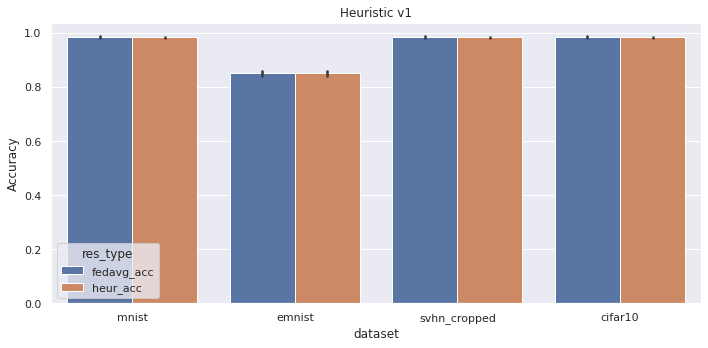

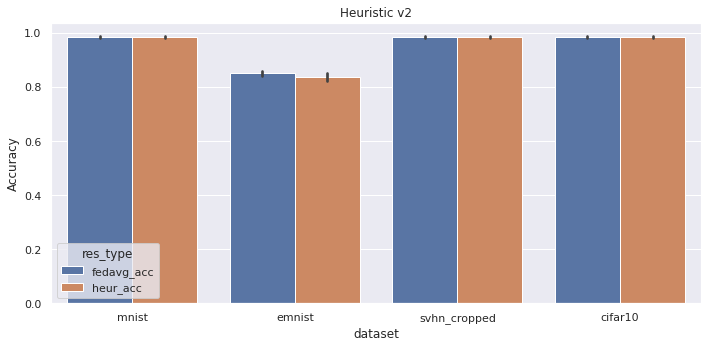

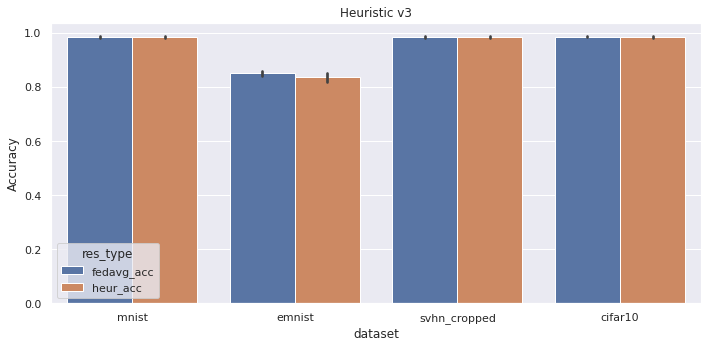

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

for v in [1, 2, 3]:
    df = load_heur_results(v)
    plt.figure(figsize=(10, 5))

    sns.barplot(y="acc", x="dataset", hue="res_type", hue_order= ["fedavg_acc", "heur_acc"], data=df)
    plt.title(f"Heuristic v{v}")
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.savefig(fname=f"figures/heur_v{v}_res.pdf")
    plt.show()

In [8]:
import numpy as np

for v in [1, 2, 3]:
    df = load_heur_results(v, melt=False)
    print(f"v{v}")
    mean_heur = np.mean(df.heur_acc)
    std_heur = np.std(df.heur_acc)
    mean_gs = np.mean(df.fedavg_acc)
    std_gs = np.std(df.fedavg_acc)
    print(f"{mean_heur} += {std_heur}, {mean_gs} += {std_gs}, {mean_heur - mean_gs}")

v1
0.9509388189614 += 0.05934246469728874, 0.9520758566666667 += 0.05962809454388689, -0.0011370377052667413
v2
0.9484936066653462 += 0.06564572724271048, 0.9520758566666667 += 0.05962809454388689, -0.0035822500013205083
v3
0.9482415016955651 += 0.06728910181651117, 0.9520758566666667 += 0.05962809454388689, -0.003834354971101628
